## XGBoost

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font)

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [30]:
df.info()   # non-null: 이상치 없음음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [31]:
Y = df['채무 불이행 여부']
X = df.drop('채무 불이행 여부', axis=1)

print(X)

              UID            주거 형태      연간 소득 현재 직장 근속 연수  체납 세금 압류 횟수  \
0     TRAIN_00000               자가  1941337.5      10년 이상          0.0   
1     TRAIN_00001               월세  1979505.0      10년 이상          0.0   
2     TRAIN_00002               월세  1356381.0          4년          0.0   
3     TRAIN_00003               월세  1049017.5          6년          0.0   
4     TRAIN_00004               월세  4320217.5          2년          0.0   
...           ...              ...        ...         ...          ...   
9995  TRAIN_09995  주택 담보 대출 (거주 중)  1339473.0      10년 이상          0.0   
9996  TRAIN_09996  주택 담보 대출 (거주 중)  2297230.5          2년          0.0   
9997  TRAIN_09997  주택 담보 대출 (거주 중)  1221523.5      10년 이상          0.0   
9998  TRAIN_09998               자가  3343584.0      10년 이상          0.0   
9999  TRAIN_09999  주택 담보 대출 (거주 중)  2175133.5          5년          0.0   

      개설된 신용계좌 수  신용 거래 연수   최대 신용한도  신용 문제 발생 횟수  마지막 연체 이후 경과 개월 수  \
0              9      13.4  400597.5   

In [32]:
# X 라벨 인코딩

from sklearn.preprocessing import LabelEncoder
def encode_feature(df):
    
    categories = ['주거 형태', '현재 직장 근속 연수', '대출 목적', '대출 상환 기간']
    for cate_item in categories:
        label_encoder = LabelEncoder()
        df[cate_item] = label_encoder.fit_transform(df[cate_item])
    
    return df
    
encode_feature(X)
print(X)


              UID  주거 형태      연간 소득  현재 직장 근속 연수  체납 세금 압류 횟수  개설된 신용계좌 수  \
0     TRAIN_00000      1  1941337.5            0          0.0           9   
1     TRAIN_00001      0  1979505.0            0          0.0           5   
2     TRAIN_00002      0  1356381.0            5          0.0          12   
3     TRAIN_00003      0  1049017.5            7          0.0          15   
4     TRAIN_00004      0  4320217.5            3          0.0          11   
...           ...    ...        ...          ...          ...         ...   
9995  TRAIN_09995      2  1339473.0            0          0.0           9   
9996  TRAIN_09996      2  2297230.5            3          0.0          11   
9997  TRAIN_09997      2  1221523.5            0          0.0           9   
9998  TRAIN_09998      1  3343584.0            0          0.0          10   
9999  TRAIN_09999      2  2175133.5            6          0.0           5   

      신용 거래 연수   최대 신용한도  신용 문제 발생 횟수  마지막 연체 이후 경과 개월 수  개인 파산 횟수  대출 목적  

In [33]:
# 'UID' 제거 (식별자이므로 필요 없음)
X = X.drop(columns=['UID'])

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   주거 형태              10000 non-null  int64  
 1   연간 소득              10000 non-null  float64
 2   현재 직장 근속 연수        10000 non-null  int64  
 3   체납 세금 압류 횟수        10000 non-null  float64
 4   개설된 신용계좌 수         10000 non-null  int64  
 5   신용 거래 연수           10000 non-null  float64
 6   최대 신용한도            10000 non-null  float64
 7   신용 문제 발생 횟수        10000 non-null  int64  
 8   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 9   개인 파산 횟수           10000 non-null  int64  
 10  대출 목적              10000 non-null  int64  
 11  대출 상환 기간           10000 non-null  int64  
 12  현재 대출 잔액           10000 non-null  float64
 13  현재 미상환 신용액         10000 non-null  float64
 14  월 상환 부채액           10000 non-null  float64
 15  신용 점수              10000 non-null  int64  
dtypes: float64(7), int64(9)

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=5, 
    learning_rate=0.1,
    random_state=0
)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [36]:
# 예측
y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

# 평가 (accuracy_score 사용)
print("훈련 데이터 정확도:\n", accuracy_score(y_train, y_pred_train))
print("훈련 데이터 정밀도:\n", precision_score(y_train, y_pred_train))
print("훈련 데이터 재현율:\n", recall_score(y_train, y_pred_train))

print('='*30)

print("평가 데이터 정확도:\n", accuracy_score(y_test, y_pred_test))
print("평가 데이터 정밀도:\n", precision_score(y_test, y_pred_test))
print("평가 데이터 재현율:\n", recall_score(y_test, y_pred_test))

훈련 데이터 정확도:
 0.8
훈련 데이터 정밀도:
 0.7952981651376146
훈련 데이터 재현율:
 0.5482213438735178
평가 데이터 정확도:
 0.7172
평가 데이터 정밀도:
 0.659963436928702
평가 데이터 재현율:
 0.409297052154195


In [38]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

0.8
0.7172
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      1618
           1       0.66      0.41      0.51       882

    accuracy                           0.72      2500
   macro avg       0.70      0.65      0.65      2500
weighted avg       0.71      0.72      0.70      2500



In [39]:
# XGBClassifier에 조기종료 적용 -> 과적합 방지, 훈련시간 단축
xgb_clf = XGBClassifier(
    n_estimators=500,
    max_depth=3, 
    learning_rate=0.01,
    random_state=0,
    early_stopping_rounds=10,   # 성능이 일정 횟수 이상 향상되지 않으면 조기종료 (반복을 중단할 횟수)
    eval_metrics='logloss'
    )

In [40]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state=0)
eval_set = [(X_tr, y_tr), (X_val, y_val)]
xgb_clf.fit(X_tr, y_tr, eval_set=eval_set, verbose=True)
# eval_set: 검증 데이터, verbose: 학습 중 평가 결과 출력 여부

[0]	validation_0-logloss:0.63796	validation_1-logloss:0.63961
[1]	validation_0-logloss:0.63711	validation_1-logloss:0.63872
[2]	validation_0-logloss:0.63627	validation_1-logloss:0.63784
[3]	validation_0-logloss:0.63545	validation_1-logloss:0.63699
[4]	validation_0-logloss:0.63465	validation_1-logloss:0.63618
[5]	validation_0-logloss:0.63386	validation_1-logloss:0.63539
[6]	validation_0-logloss:0.63309	validation_1-logloss:0.63460
[7]	validation_0-logloss:0.63233	validation_1-logloss:0.63383
[8]	validation_0-logloss:0.63159	validation_1-logloss:0.63308
[9]	validation_0-logloss:0.63086	validation_1-logloss:0.63236
[10]	validation_0-logloss:0.63014	validation_1-logloss:0.63163
[11]	validation_0-logloss:0.62944	validation_1-logloss:0.63092
[12]	validation_0-logloss:0.62869	validation_1-logloss:0.63022
[13]	validation_0-logloss:0.62800	validation_1-logloss:0.62953
[14]	validation_0-logloss:0.62733	validation_1-logloss:0.62885
[15]	validation_0-logloss:0.62661	validation_1-logloss:0.62819


[16]	validation_0-logloss:0.62596	validation_1-logloss:0.62758
[17]	validation_0-logloss:0.62527	validation_1-logloss:0.62693
[18]	validation_0-logloss:0.62464	validation_1-logloss:0.62630
[19]	validation_0-logloss:0.62401	validation_1-logloss:0.62571
[20]	validation_0-logloss:0.62340	validation_1-logloss:0.62510
[21]	validation_0-logloss:0.62274	validation_1-logloss:0.62449
[22]	validation_0-logloss:0.62215	validation_1-logloss:0.62389
[23]	validation_0-logloss:0.62154	validation_1-logloss:0.62335
[24]	validation_0-logloss:0.62096	validation_1-logloss:0.62280
[25]	validation_0-logloss:0.62039	validation_1-logloss:0.62223
[26]	validation_0-logloss:0.61981	validation_1-logloss:0.62170
[27]	validation_0-logloss:0.61926	validation_1-logloss:0.62117
[28]	validation_0-logloss:0.61870	validation_1-logloss:0.62064
[29]	validation_0-logloss:0.61815	validation_1-logloss:0.62014
[30]	validation_0-logloss:0.61760	validation_1-logloss:0.61958
[31]	validation_0-logloss:0.61706	validation_1-logloss:

c:\Users\dltjs\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\callback.py:386: UserWarning: [01:42:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics" } are not used.

  self.starting_round = model.num_boosted_rounds()


[77]	validation_0-logloss:0.59630	validation_1-logloss:0.60031
[78]	validation_0-logloss:0.59593	validation_1-logloss:0.59999
[79]	validation_0-logloss:0.59560	validation_1-logloss:0.59967
[80]	validation_0-logloss:0.59523	validation_1-logloss:0.59937
[81]	validation_0-logloss:0.59487	validation_1-logloss:0.59907
[82]	validation_0-logloss:0.59455	validation_1-logloss:0.59876
[83]	validation_0-logloss:0.59417	validation_1-logloss:0.59850
[84]	validation_0-logloss:0.59373	validation_1-logloss:0.59811
[85]	validation_0-logloss:0.59339	validation_1-logloss:0.59784
[86]	validation_0-logloss:0.59307	validation_1-logloss:0.59753
[87]	validation_0-logloss:0.59273	validation_1-logloss:0.59726
[88]	validation_0-logloss:0.59230	validation_1-logloss:0.59688
[89]	validation_0-logloss:0.59194	validation_1-logloss:0.59663
[90]	validation_0-logloss:0.59163	validation_1-logloss:0.59634
[91]	validation_0-logloss:0.59130	validation_1-logloss:0.59609
[92]	validation_0-logloss:0.59089	validation_1-logloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, ...)

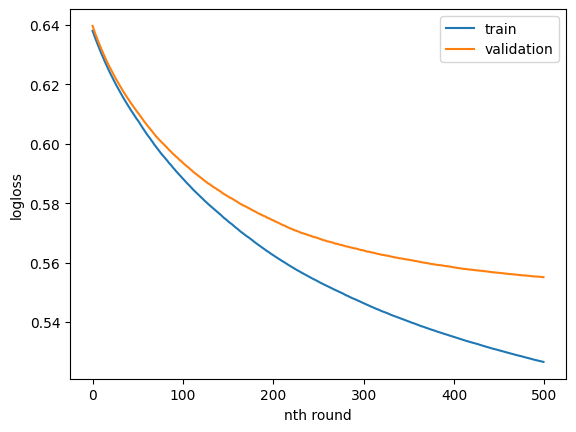

In [41]:
# 훈련 과정 시각화
import matplotlib.pyplot as plt

result = xgb_clf.evals_result()
train_loss = result['validation_0']['logloss']
val_loss = result['validation_1']['logloss']

plt.plot(train_loss, label='train')
plt.plot(val_loss, label='validation')
plt.legend()
plt.xlabel('nth round')
plt.ylabel('logloss')
plt.legend
plt.show()

In [ ]:
import optuna
import xgboost as xgb

# Optuna 최적화 함수 정의
def objective(trial):
    # 하이퍼파라미터 탐색 공간 정의
    params = {
        'objective': 'binary:logistic',  # 이진 분류
        'eval_metric': 'logloss',  # 손실 함수
        'booster': 'gbtree',  # 기본 부스터
        'max_depth': trial.suggest_int('max_depth', 3, 10),  # 트리 깊이
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),  # 학습률
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),  # 트리 개수
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),  # 데이터 샘플링 비율
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),  # 피처 샘플링 비율
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),  # L1 정규화
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),  # L2 정규화
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),  # 리프 노드 분할 시 최소 손실 감소량
    }

    # XGBoost 모델 학습
    model = xgb.XGBClassifier(**params, use_label_encoder=False)
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy  # 높은 정확도를 목표로 최적화

# Optuna 스터디 생성 및 최적화 수행
study = optuna.create_study(direction='maximize')  # 정확도를 높이는 방향으로 최적화
study.optimize(objective, n_trials=1000)  # 50번 시도

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", study.best_params)

# 최적의 하이퍼파라미터로 모델 학습
best_params = study.best_params
best_model = xgb.XGBClassifier(**best_params, use_label_encoder=False)
best_model.fit(X_train, y_train)

# 최적 모델 평가
y_pred_best = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_best)
print("Final Model Accuracy:", final_accuracy)

[I 2025-03-18 00:46:42,155] A new study created in memory with name: no-name-a17595d1-e380-4061-84a9-3d3c4f8e2e71
[I 2025-03-18 00:46:42,409] Trial 0 finished with value: 0.7184 and parameters: {'max_depth': 5, 'learning_rate': 0.09401578664055546, 'n_estimators': 621, 'subsample': 0.809954467412839, 'colsample_bytree': 0.9359317023818319, 'reg_alpha': 3.457236463557356, 'reg_lambda': 5.904749303834317, 'gamma': 4.562357936294529}. Best is trial 0 with value: 0.7184.
[I 2025-03-18 00:46:43,269] Trial 1 finished with value: 0.6988 and parameters: {'max_depth': 10, 'learning_rate': 0.07710933025515786, 'n_estimators': 929, 'subsample': 0.755121423300043, 'colsample_bytree': 0.9862393532750251, 'reg_alpha': 0.27320301292271143, 'reg_lambda': 7.072218745531275, 'gamma': 0.5073663372313697}. Best is trial 0 with value: 0.7184.
[I 2025-03-18 00:46:43,774] Trial 2 finished with value: 0.7156 and parameters: {'max_depth': 9, 'learning_rate': 0.05896661301339083, 'n_estimators': 893, 'subsample

Best Hyperparameters: {'max_depth': 9, 'learning_rate': 0.1651544104787957, 'n_estimators': 558, 'subsample': 0.5793189253978034, 'colsample_bytree': 0.5258114902668415, 'reg_alpha': 8.588420926194235, 'reg_lambda': 6.999988450130937, 'gamma': 3.4220613266534015}
Final Model Accuracy: 0.7324


In [42]:
# {'max_depth': 9, 'learning_rate': 0.1651544104787957, 'n_estimators': 558, 'subsample': 0.5793189253978034, 'colsample_bytree': 0.5258114902668415, 'reg_alpha': 8.588420926194235, 'reg_lambda': 6.999988450130937, 'gamma': 3.4220613266534015}

best_model = XGBClassifier(
    max_depth= 9,
    learning_rate= 0.1651544104787957,
    n_estimators= 558,
    subsample= 0.5793189253978034,
    colsample_bytree= 0.5258114902668415,
    reg_alpha= 8.588420926194235,
    reg_lambda= 6.999988450130937,
    gamma= 3.4220613266534015,
    random_state=0,
    early_stopping_rounds=10,   # 성능이 일정 횟수 이상 향상되지 않으면 조기종료 (반복을 중단할 횟수)
    eval_metrics='logloss'
    )

In [43]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state=0)
eval_set = [(X_tr, y_tr), (X_val, y_val)]
best_model.fit(X_tr, y_tr, eval_set=eval_set, verbose=True)
# eval_set: 검증 데이터, verbose: 학습 중 평가 결과 출력 여부

[0]	validation_0-logloss:0.62755	validation_1-logloss:0.63056
[1]	validation_0-logloss:0.61956	validation_1-logloss:0.62363
[2]	validation_0-logloss:0.61148	validation_1-logloss:0.61696
[3]	validation_0-logloss:0.60287	validation_1-logloss:0.60939
[4]	validation_0-logloss:0.59482	validation_1-logloss:0.60273
[5]	validation_0-logloss:0.58953	validation_1-logloss:0.59847
[6]	validation_0-logloss:0.58586	validation_1-logloss:0.59610
[7]	validation_0-logloss:0.58160	validation_1-logloss:0.59221
[8]	validation_0-logloss:0.57821	validation_1-logloss:0.58956
[9]	validation_0-logloss:0.57553	validation_1-logloss:0.58770
[10]	validation_0-logloss:0.57106	validation_1-logloss:0.58374
[11]	validation_0-logloss:0.56805	validation_1-logloss:0.58046
[12]	validation_0-logloss:0.56582	validation_1-logloss:0.57834
[13]	validation_0-logloss:0.56399	validation_1-logloss:0.57692
[14]	validation_0-logloss:0.56095	validation_1-logloss:0.57421
[15]	validation_0-logloss:0.55914	validation_1-logloss:0.57343
[1

c:\Users\dltjs\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\callback.py:386: UserWarning: [01:42:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics" } are not used.

  self.starting_round = model.num_boosted_rounds()


[102]	validation_0-logloss:0.53267	validation_1-logloss:0.55812
[103]	validation_0-logloss:0.53267	validation_1-logloss:0.55812
[104]	validation_0-logloss:0.53267	validation_1-logloss:0.55812
[105]	validation_0-logloss:0.53267	validation_1-logloss:0.55812
[106]	validation_0-logloss:0.53267	validation_1-logloss:0.55812
[107]	validation_0-logloss:0.53267	validation_1-logloss:0.55812
[108]	validation_0-logloss:0.53252	validation_1-logloss:0.55791
[109]	validation_0-logloss:0.53252	validation_1-logloss:0.55791
[110]	validation_0-logloss:0.53252	validation_1-logloss:0.55792
[111]	validation_0-logloss:0.53252	validation_1-logloss:0.55792
[112]	validation_0-logloss:0.53252	validation_1-logloss:0.55792
[113]	validation_0-logloss:0.53253	validation_1-logloss:0.55792
[114]	validation_0-logloss:0.53252	validation_1-logloss:0.55792
[115]	validation_0-logloss:0.53253	validation_1-logloss:0.55793
[116]	validation_0-logloss:0.53252	validation_1-logloss:0.55792
[117]	validation_0-logloss:0.53252	valid

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5258114902668415, device=None,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, eval_metrics='logloss', feature_types=None,
              feature_weights=None, gamma=3.4220613266534015, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1651544104787957, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=558, n_jobs=None, ...)

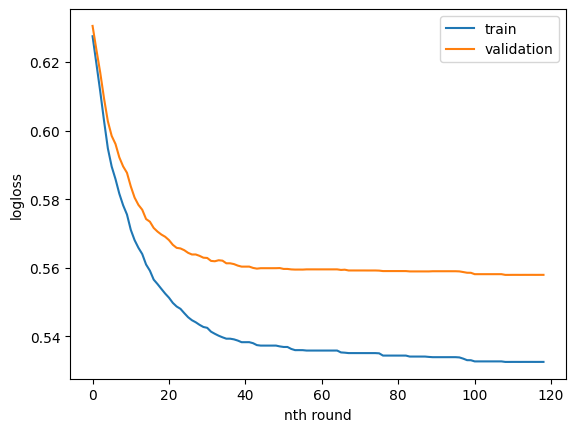

In [44]:
# 훈련 과정 시각화
import matplotlib.pyplot as plt

result = best_model.evals_result()
train_loss = result['validation_0']['logloss']
val_loss = result['validation_1']['logloss']

plt.plot(train_loss, label='train')
plt.plot(val_loss, label='validation')
plt.legend()
plt.xlabel('nth round')
plt.ylabel('logloss')
plt.legend
plt.show()

In [45]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print(f'훈련 정확도: {accuracy_score(y_train, y_pred_train)}')
print(f'평가 정확도: {accuracy_score(y_test, y_pred_test)}')

print(classification_report(y_test, y_pred_test))

훈련 정확도: 0.7362666666666666
평가 정확도: 0.7204
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1618
           1       0.68      0.39      0.50       882

    accuracy                           0.72      2500
   macro avg       0.71      0.65      0.65      2500
weighted avg       0.71      0.72      0.70      2500



<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

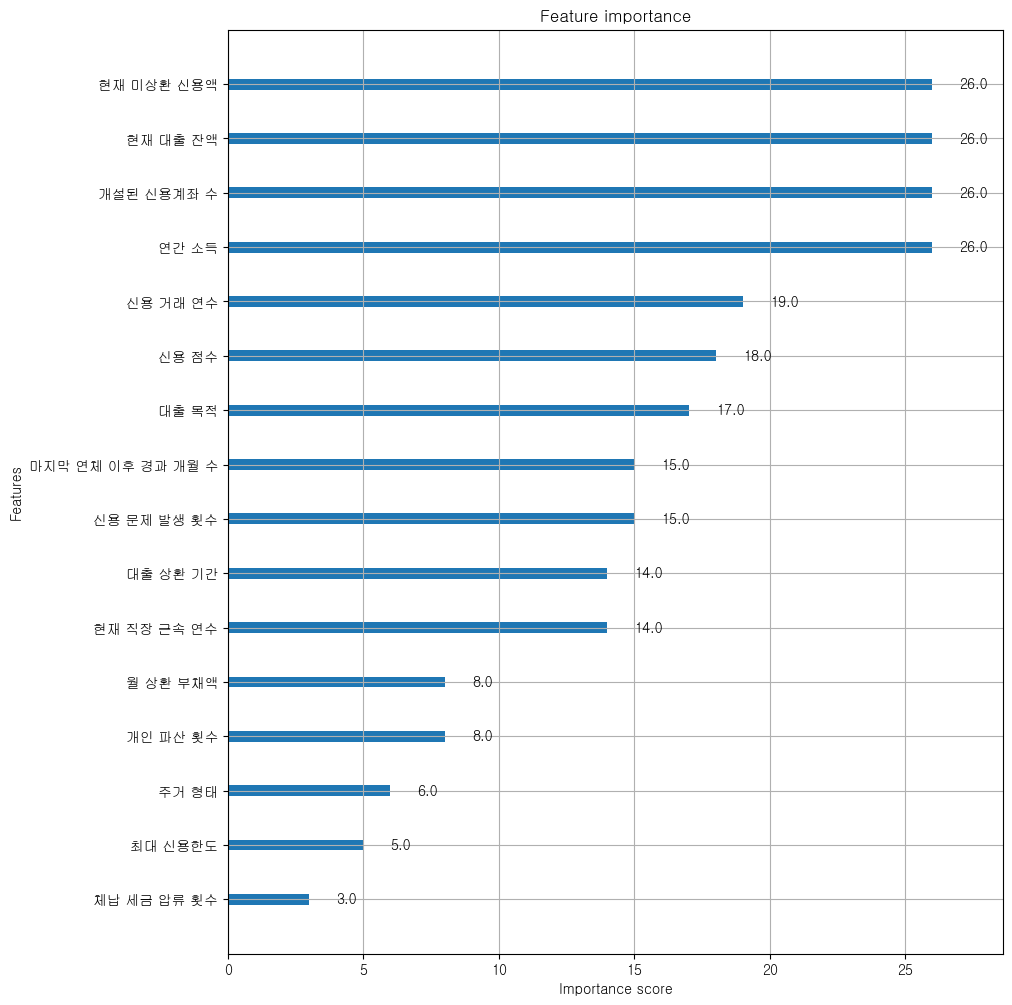

In [50]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(best_model, ax=ax)